In [1]:
import pandas as pd

In [5]:
df=pd.read_csv('https://raw.githubusercontent.com/sachitwagle99/INFO6105_Assignments/main/Customer%20Churn.csv')
df.head()

,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Age,Customer Value,Churn
0,8,0,38,0,4370,71,5,17,3,1,1,30,197.640,0
1,0,0,39,0,318,5,7,4,2,1,2,25,46.035,0
2,10,0,37,0,2453,60,359,24,3,1,1,30,1536.520,0
3,10,0,38,0,4198,66,1,35,1,1,1,15,240.020,0
4,3,0,38,0,2393,58,2,33,1,1,1,15,145.805,0


In [4]:
len(df)

3150

In [6]:
pip install h2o

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.2/265.2 MB 4.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for h2o: filename=h2o-3.44.0.3-py2.py3-none-any.whl size=265293968 sha256=81b85588a744702ae99edd934f42acd45201c64c976015261717e0a660551e79
  Stored in directory: /root/.cache/pip/wheels/77/9a/1c/2da26f943fd46b57f3c20b54847b936b9152b831dc7447cf71
Successfully built h2o


In [7]:
import h2o
from h2o.automl import H2OAutoML

In [30]:
h2o.init()
h2odata=h2o.H2OFrame(df)

Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O_cluster_uptime:,29 mins 35 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.44.0.3
H2O_cluster_version_age:,1 month and 30 days
H2O_cluster_name:,H2O_from_python_unknownUser_pg8bjg
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.170 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [12]:
import statsmodels.api as sm

In [14]:
model = sm.OLS(df['Churn'],df.drop('Churn',axis=1)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Churn   R-squared (uncentered):                   0.534
Model:                            OLS   Adj. R-squared (uncentered):              0.532
Method:                 Least Squares   F-statistic:                              276.7
Date:                Mon, 19 Feb 2024   Prob (F-statistic):                        0.00
Time:                        22:20:31   Log-Likelihood:                         -351.85
No. Observations:                3150   AIC:                                      729.7
Df Residuals:                    3137   BIC:                                      808.4
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Call  Failure               0.0068      0.001      5.982      0.000       0.005       0.009
Complains                   0.5665      0.020     29.022      0.000       0.528       0.605
Subscription  Length       -0.0027      0.001     -4.895      0.000      -0.004      -0.002
Charge  Amount             -0.0209      0.006     -3.753      0.000      -0.032      -0.010
Seconds of Use           1.333e-05   5.48e-06      2.431      0.015    2.58e-06    2.41e-05
Frequency of use           -0.0018      0.000     -4.906      0.000      -0.003      -0.001
Frequency of SMS           -0.0004      0.000     -1.385      0.166      -0.001       0.000
Distinct Called Numbers    -0.0015      0.000     -3.349      0.001      -0.002      -0.001
Age Group                  -0.0336      0.020     -1.651      0.099      -0.074       0.006
Tariff Plan                -0.0239      0.019     -1.239      0.216      -0.062       0.014
Status                      0.2409      0.014     16.774      0.000       0.213       0.269
Age                         0.0030      0.002      1.477      0.140      -0.001       0.007
Customer Value           5.133e-05   6.74e-05      0.761      0.446   -8.08e-05       0.000
==============================================================================
Omnibus:                      672.601   Durbin-Watson:                   1.850
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1694.296
Skew:                           1.157   Prob(JB):                         0.00
Kurtosis:                       5.749   Cond. No.                     2.85e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 2.85e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<Axes: >

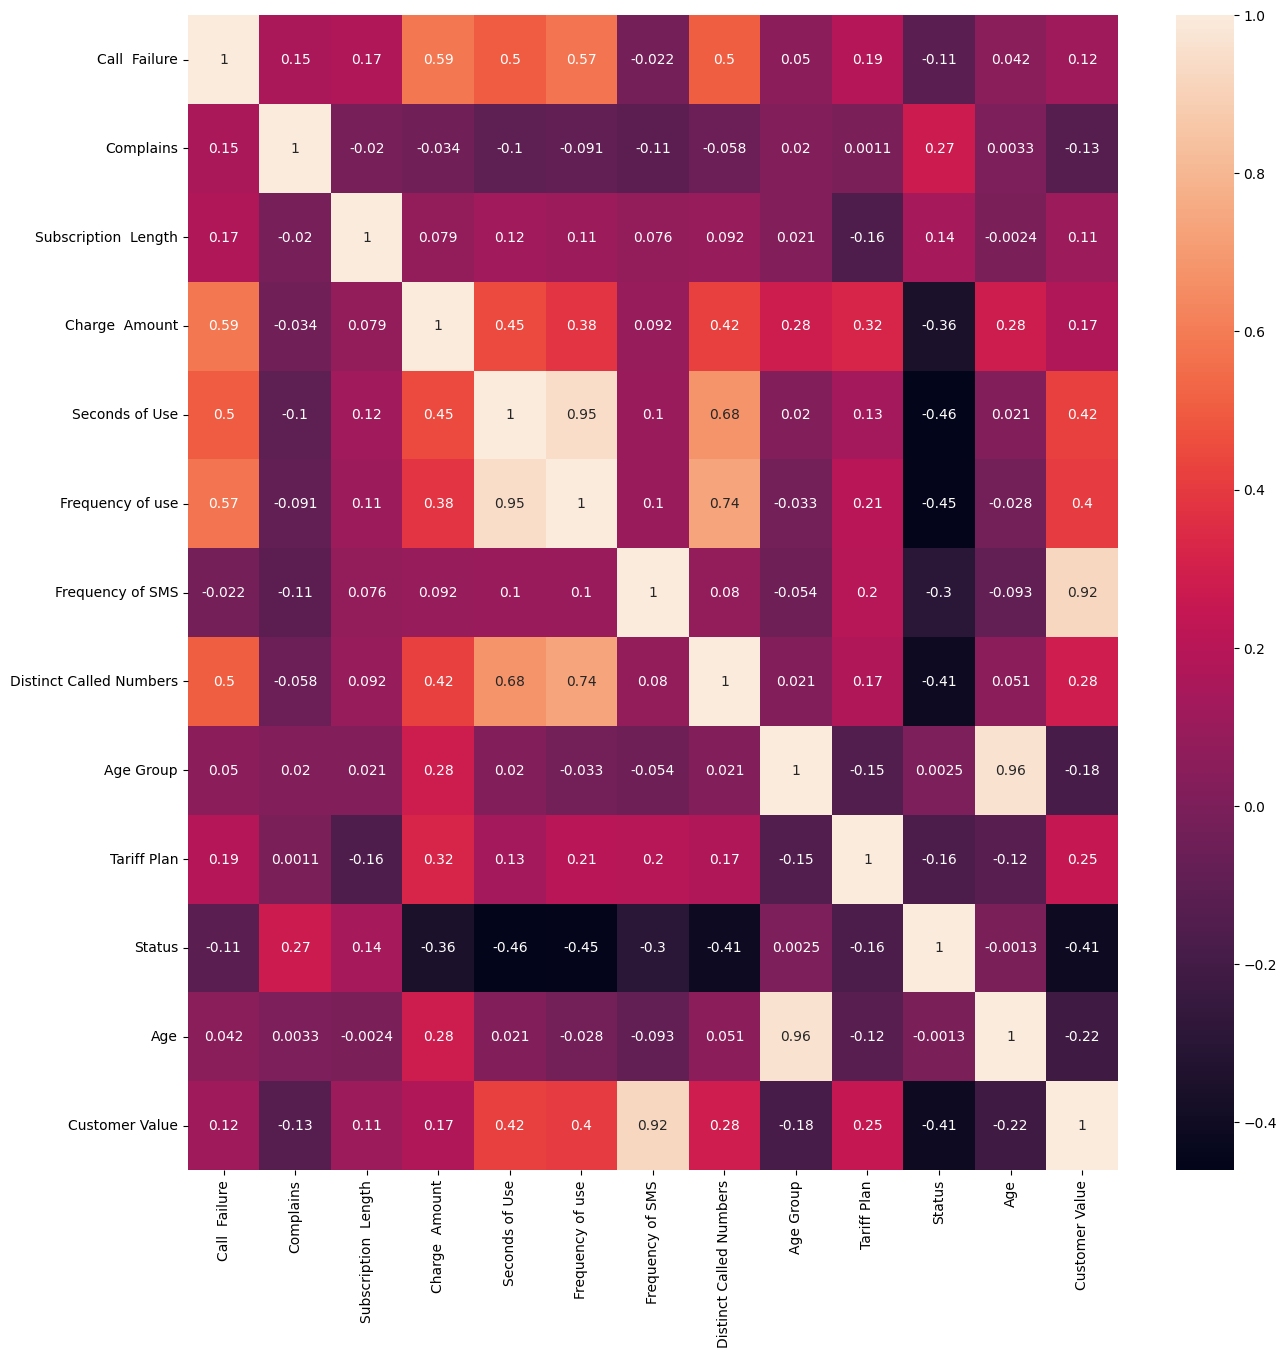

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15,15))
sns.heatmap(df.drop('Churn',axis=1).corr(),annot=True)

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

In [21]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('Churn',axis=1), df['Churn'], test_size=0.25, random_state=1)


In [22]:
import numpy as np
from sklearn.linear_model import Ridge

In [65]:
ridge=Ridge()
ridge.fit(X_train,y_train)

Ridge()

In [66]:
y_pred=ridge.predict(X_test)

In [67]:
print(mean_absolute_error(y_test,y_pred))

0.16702823239966796


In [31]:
h2odata.head()

Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Age,Customer Value,Churn
8,0,38,0,4370,71,5,17,3,1,1,30,197.64,0
0,0,39,0,318,5,7,4,2,1,2,25,46.035,0
10,0,37,0,2453,60,359,24,3,1,1,30,1536.52,0
10,0,38,0,4198,66,1,35,1,1,1,15,240.02,0
3,0,38,0,2393,58,2,33,1,1,1,15,145.805,0
11,0,38,1,3775,82,32,28,3,1,1,30,282.28,0
4,0,38,0,2360,39,285,18,3,1,1,30,1235.96,0
13,0,37,2,9115,121,144,43,3,1,1,30,945.44,0
7,0,38,0,13773,169,0,44,3,1,1,30,557.68,0
7,0,38,1,4515,83,2,25,3,1,1,30,191.92,0


In [33]:
train, test = h2odata.split_frame( destination_frames = ["train.hex", "test.hex"])

In [42]:
list(set(list(train.columns))-set('Churn'))

['Frequency of use',
 'Complains',
 'Seconds of Use',
 'Age Group',
 'Subscription  Length',
 'Distinct Called Numbers',
 'Age',
 'Tariff Plan',
 'Charge  Amount',
 'Call  Failure',
 'Churn',
 'Frequency of SMS',
 'Status',
 'Customer Value']

In [50]:
aml = H2OAutoML(max_models=10, seed=1,sort_metric='MAE')
aml.train(x=list(set(list(train.columns))-set('Churn')), y='Churn', training_frame=train)

AutoML progress: |
22:50:21.986: _response param, We have detected that your response column has only 2 unique values (0/1). If you wish to train a binary model instead of a regression model, convert your target column to categorical before training.

██
22:50:34.158: _response param, We have detected that your response column has only 2 unique values (0/1). If you wish to train a binary model instead of a regression model, convert your target column to categorical before training.


22:50:34.857: _response param, We have detected that your response column has only 2 unique values (0/1). If you wish to train a binary model instead of a regression model, convert your target column to categorical before training.

██
22:50:43.149: _response param, We have detected that your response column has only 2 unique values (0/1). If you wish to train a binary model instead of a regression model, convert your target column to categorical before training.

█
22:50:47.725: _response param, We have d

Model Details
=============
H2ORandomForestEstimator : Distributed Random Forest
Model Key: DRF_1_AutoML_3_20240219_225021


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    40                 40                          58207                  13           20           17.025        90            140           110.675

ModelMetricsRegression: drf
** Reported on train data. **

MSE: 0.03282800650654598
RMSE: 0.18118500629617776
MAE: 0.06890138015268858
RMSLE: 0.12639009163085177
Mean Residual Deviance: 0.03282800650654598

ModelMetricsRegression: drf
** Reported on cross-validation data. **

MSE: 0.03178868786037144
RMSE: 0.17829382451552112
MAE: 0.07157464651052116
RMSLE: 0.12425217672151967
Mean Residual Deviance: 0.03178868786037144

Cross-Validation Metrics Summary: 
                        mean       sd          cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid
----------------------  ---------  ----------  ------------  ------------  ------------  ------------  ------------
mae                     0.0715315  0.00671598  0.0655122     0.0746269     0.0647296     0.0718643     0.0809245
mean_residual_deviance  0.0318186  0.00426774  0.0309105     0.0348256     0.0272019     0.0286896     0.0374652
mse                     0.0318186  0.00426774  0.0309105     0.0348256     0.0272019     0.0286896     0.0374652
r2                      0.755219   0.040167    0.756994      0.716602      0.79601       0.793788      0.712703
residual_deviance       0.0318186  0.00426774  0.0309105     0.0348256     0.0272019     0.0286896     0.0374652
rmse                    0.17806    0.0118976   0.175814      0.186616      0.16493       0.16938       0.193559
rmsle                   0.12408    0.00768754  0.124567      0.127036      0.113643      0.120721      0.134434

Scoring History: 
    timestamp            duration    number_of_trees    training_rmse    training_mae    training_deviance
--  -------------------  ----------  -----------------  ---------------  --------------  -------------------
    2024-02-19 22:50:50  2.449 sec   0                  nan              nan             nan
    2024-02-19 22:50:50  2.504 sec   5                  0.232967         0.0708659       0.0542738
    2024-02-19 22:50:50  2.570 sec   10                 0.202039         0.0676374       0.0408198
    2024-02-19 22:50:50  2.629 sec   15                 0.195146         0.0706613       0.0380819
    2024-02-19 22:50:50  2.695 sec   20                 0.189457         0.0687643       0.0358939
    2024-02-19 22:50:50  2.752 sec   25                 0.183496         0.0674376       0.0336708
    2024-02-19 22:50:50  2.812 sec   30                 0.183442         0.0689952       0.0336511
    2024-02-19 22:50:50  2.872 sec   35                 0.181126         0.0681352       0.0328065
    2024-02-19 22:50:50  2.932 sec   40                 0.181185         0.0689014       0.032828

Variable Importances: 
variable                 relative_importance    scaled_importance    percentage
-----------------------  ---------------------  -------------------  ------------
Complains                1626.79                1                    0.19652
Status                   1438.57                0.884299             0.173782
Subscription  Length     969.919                0.596216             0.117168
Seconds of Use           889.563                0.54682              0.107461
Frequency of use         804.083                0.494275             0.097135
Distinct Called Numbers  632.53                 0.388821             0.076411
Customer Value           549.981                0.338077             0.0664389
Call  Failure            506.98                 0.311644             

In [51]:
leader=aml.leaderboard
print(leader)

model_id                                                       mae      rmse        mse     rmsle    mean_residual_deviance
DRF_1_AutoML_3_20240219_225021                           0.0715746  0.178294  0.0317887  0.124252                 0.0317887
StackedEnsemble_BestOfFamily_1_AutoML_3_20240219_225021  0.0783697  0.17294   0.0299082  0.121713                 0.0299082
StackedEnsemble_AllModels_1_AutoML_3_20240219_225021     0.0785441  0.173674  0.0301628  0.12205                  0.0301628
GBM_4_AutoML_3_20240219_225021                           0.0812466  0.176068  0.0309999  0.123965                 0.0309999
GBM_3_AutoML_3_20240219_225021                           0.0839082  0.180105  0.0324377  0.126625                 0.0324377
GBM_2_AutoML_3_20240219_225021                           0.0840661  0.179839  0.0323419  0.125868                 0.0323419
XGBoost_2_AutoML_3_20240219_225021                       0.0875508  0.187223  0.0350526  0.132484                 0.0350526
XGBoost_

In [52]:
bestmodel=aml.leader
bestmodel.model_performance(test)

ModelMetricsRegression: drf
** Reported on test data. **

MSE: 0.033019255819371006
RMSE: 0.18171201341510418
MAE: 0.07606290406124144
RMSLE: 0.12943777847872526
Mean Residual Deviance: 0.033019255819371006

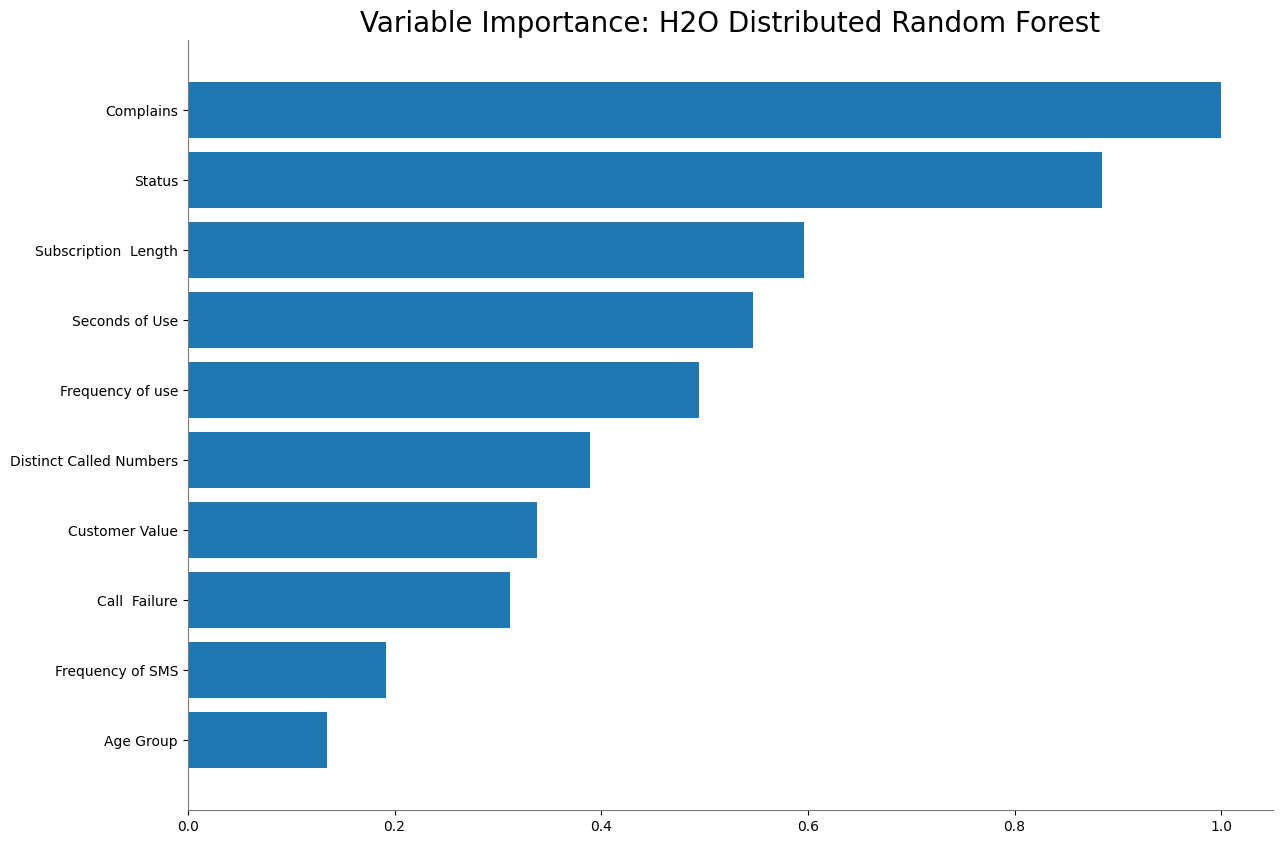

<Figure size 640x480 with 0 Axes>

In [68]:
bestmodel.varimp_plot()

Answer the following questions for all of the models:

* Is the relationship significant?

The relationship is not significant as R2 value of the dataset is 0.534 meaning independent variables explain 53% variability in the data.

* Are any model assumptions violated?

Since this is a classification problem with no non-numeric features, we are not violating any model assumptions

* Is there any multicollinearity in the model?

Referencing to the correlation plot, there is some amount of multicolliniearity present in the dataset

* In the multivariate models are predictor variables independent of all the other predictor variables?

Since there is multicollinearity present, some independent variables have linear relationship with other variables.

* Does the model make sense?

Distributed Random forest is a powerful classification algorithm and is the best model as per automl.

* Does regularization help?

Regularization increased the MAE value but is often used for generalisation of the model for unseen data.

* Which independent variables are significant?

Complain and Status are 2 most significant features.

* Which hyperparameters are important?

DRF has many hyperparameters similar to a random forest/decision tree algorithm.

**References**
1. https://statisticsbyjim.com/regression/interpret-r-squared-regression/
2. https://docs.h2o.ai/
3. https://medium.com/@lfoster49203/automl-automated-machine-learning-in-python-6906cd077c51




MIT License

Copyright (c) 2024 Sachit Wagle

Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE.
